In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import f_regression
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from statsmodels.stats.outliers_influence import variance_inflation_factor
from numpy import random

sns.set()

In [6]:
raw_data = pd.read_csv("LaptopPrice.csv")
raw_data.head()

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
0,ASUS,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,34649,2 stars,3,0
1,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,38999,3 stars,65,5
2,Lenovo,Intel,Core i3,10th,4 GB,DDR4,0 GB,1024 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,39999,3 stars,8,1
3,ASUS,Intel,Core i5,10th,8 GB,DDR4,512 GB,0 GB,Windows,32-bit,2 GB,Casual,No warranty,No,No,69990,3 stars,0,0
4,ASUS,Intel,Celeron Dual,Not Available,4 GB,DDR4,0 GB,512 GB,Windows,64-bit,0 GB,Casual,No warranty,No,No,26990,3 stars,0,0


In [7]:
raw_data.describe(include = 'all')

,brand,processor_brand,processor_name,processor_gnrtn,ram_gb,ram_type,ssd,hdd,os,os_bit,graphic_card_gb,weight,warranty,Touchscreen,msoffice,Price,rating,Number of Ratings,Number of Reviews
count,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823,823.000000,823,823.000000,823.000000
unique,8,3,11,8,4,6,7,4,3,2,5,3,4,2,2,NaN,5,NaN,NaN
top,ASUS,Intel,Core i5,11th,8 GB,DDR4,512 GB,0 GB,Windows,64-bit,0 GB,Casual,1 year,No,No,NaN,4 stars,NaN,NaN
freq,249,610,290,334,418,709,398,621,779,714,577,520,509,726,542,NaN,444,NaN,NaN
mean,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,76745.177400,NaN,315.301337,37.609964
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,45101.790525,NaN,1047.382654,121.728017
min,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16990.000000,NaN,0.000000,0.000000
25%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,46095.000000,NaN,0.000000,0.000000
50%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,64990.000000,NaN,17.000000,2.000000
75%,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,89636.000000,NaN,139.500000,18.000000


In [8]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 823 entries, 0 to 822
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   brand              823 non-null    object
 1   processor_brand    823 non-null    object
 2   processor_name     823 non-null    object
 3   processor_gnrtn    823 non-null    object
 4   ram_gb             823 non-null    object
 5   ram_type           823 non-null    object
 6   ssd                823 non-null    object
 7   hdd                823 non-null    object
 8   os                 823 non-null    object
 9   os_bit             823 non-null    object
 10  graphic_card_gb    823 non-null    object
 11  weight             823 non-null    object
 12  warranty           823 non-null    object
 13  Touchscreen        823 non-null    object
 14  msoffice           823 non-null    object
 15  Price              823 non-null    int64 
 16  rating             823 non-null    object
 1

In [9]:
raw_data.isnull().sum()

brand                0
processor_brand      0
processor_name       0
processor_gnrtn      0
ram_gb               0
ram_type             0
ssd                  0
hdd                  0
os                   0
os_bit               0
graphic_card_gb      0
weight               0
warranty             0
Touchscreen          0
msoffice             0
Price                0
rating               0
Number of Ratings    0
Number of Reviews    0
dtype: int64

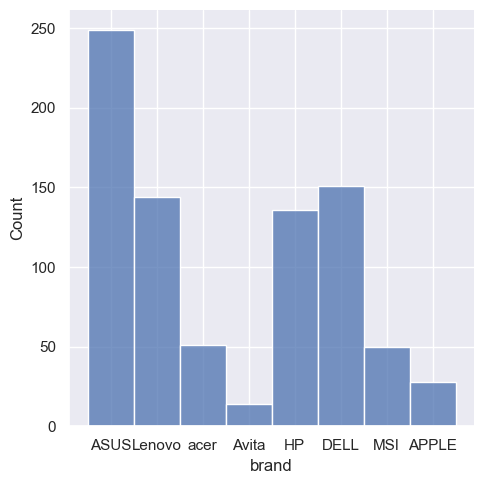

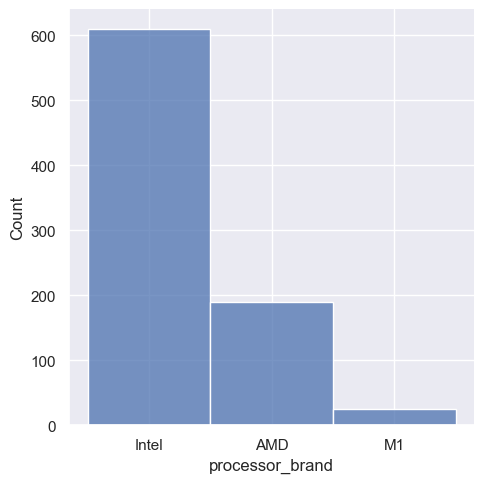

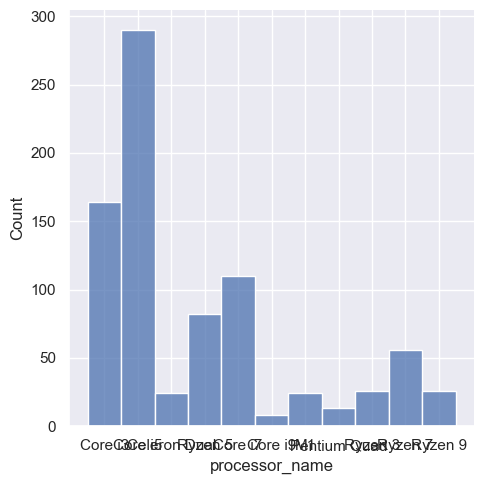

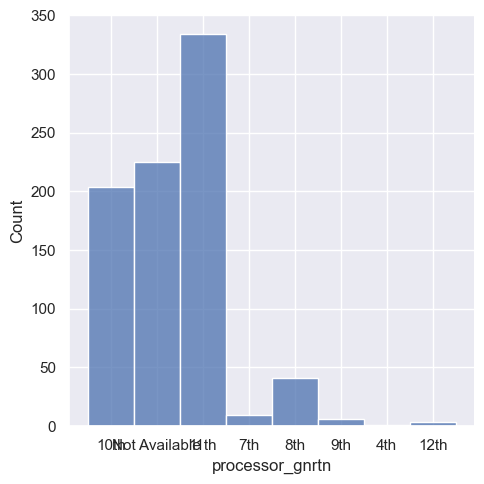

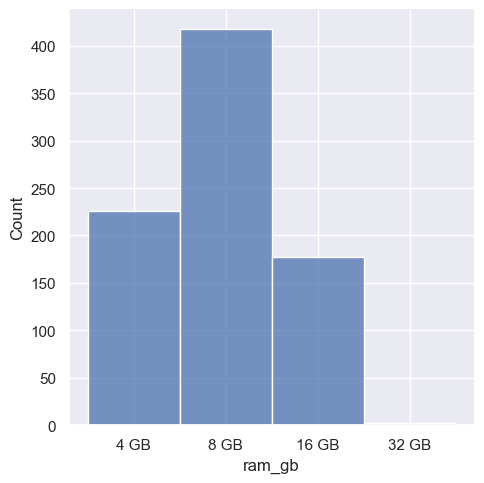

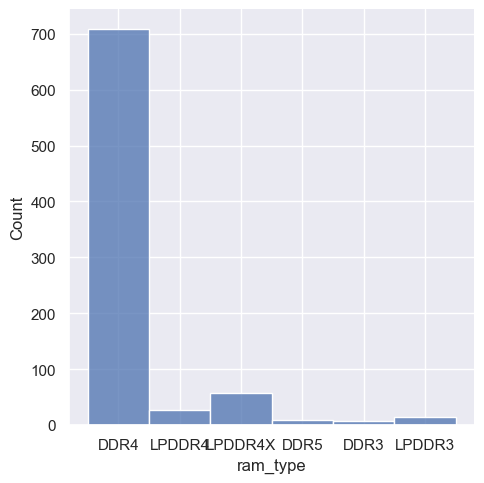

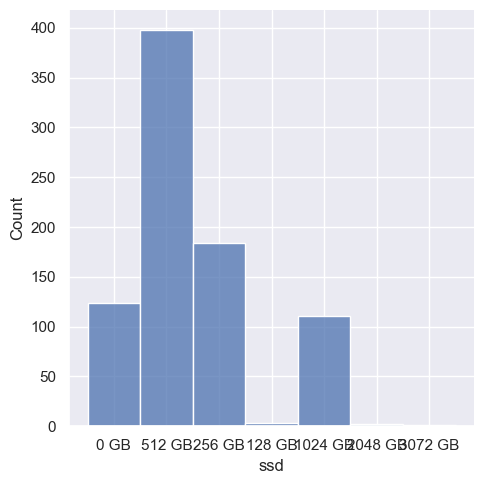

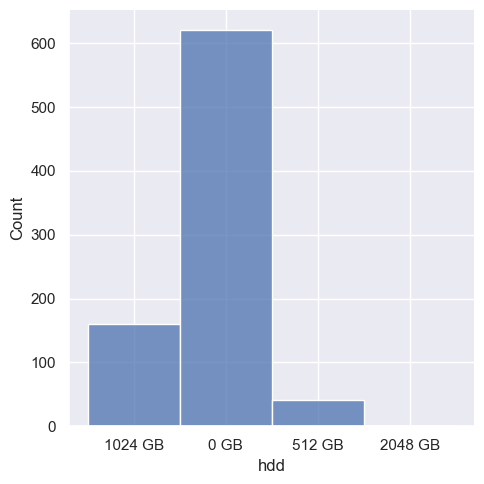

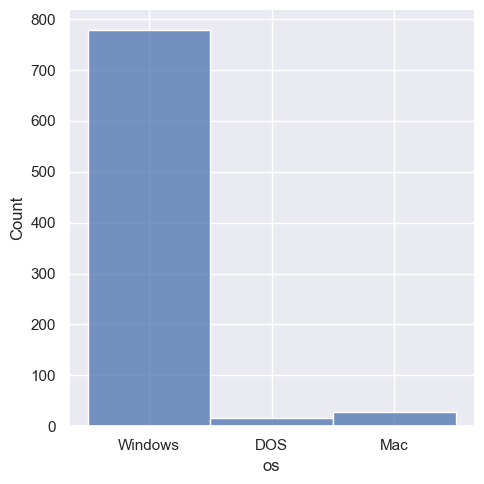

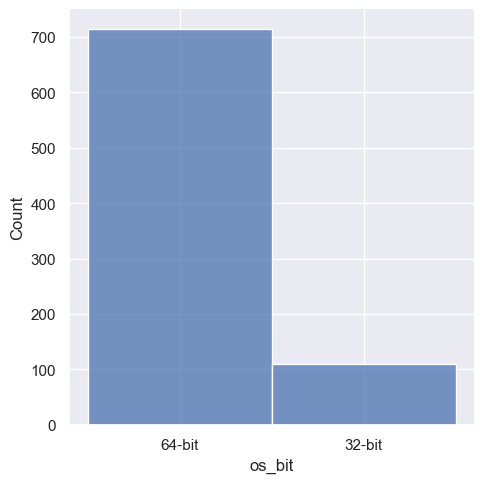

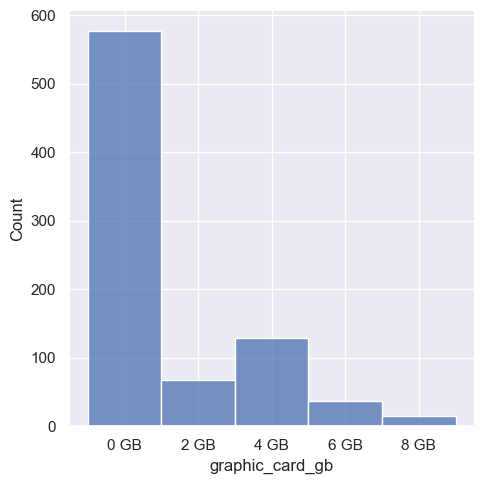

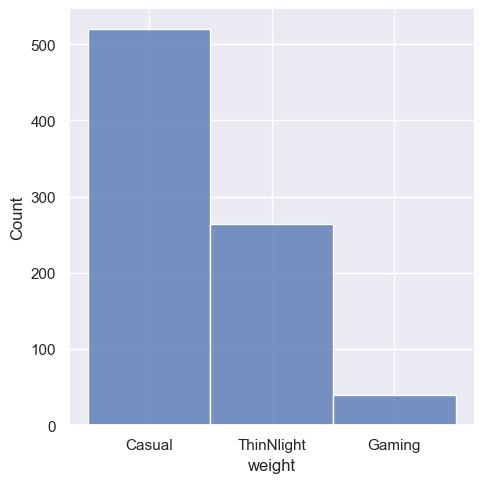

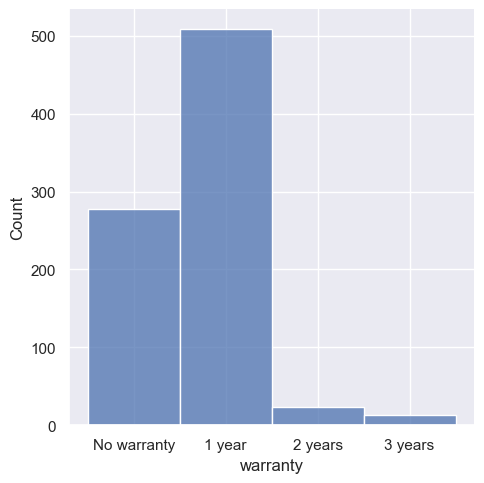

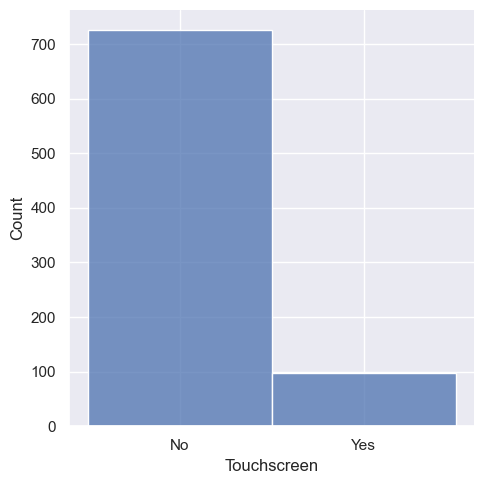

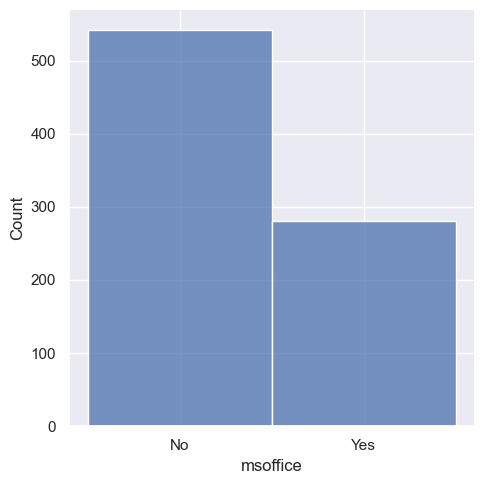

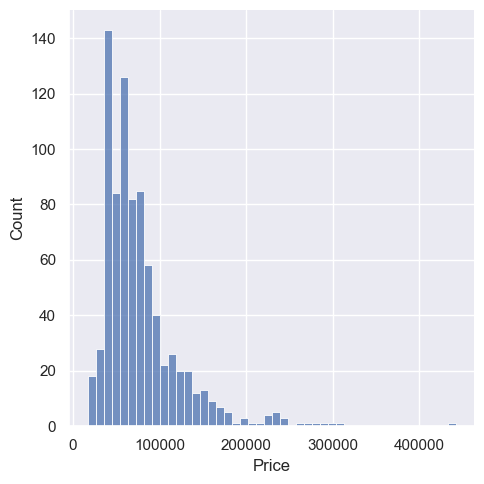

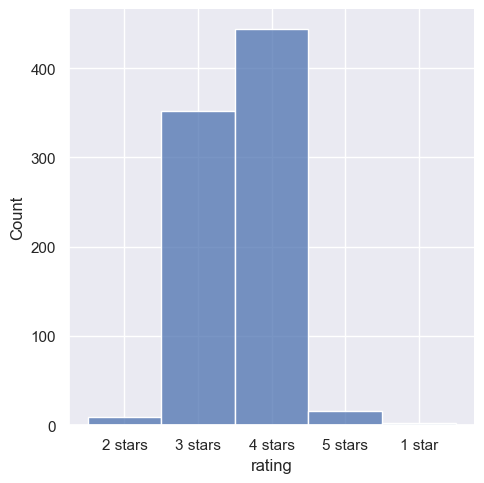

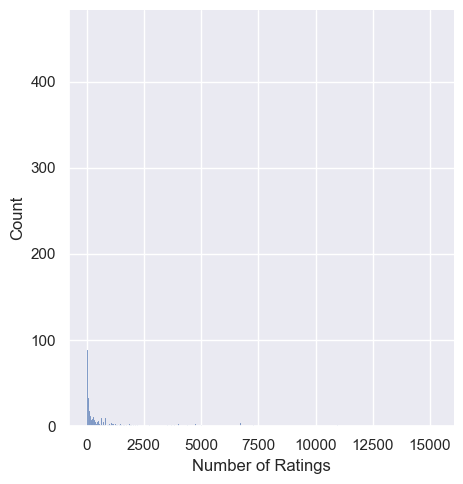

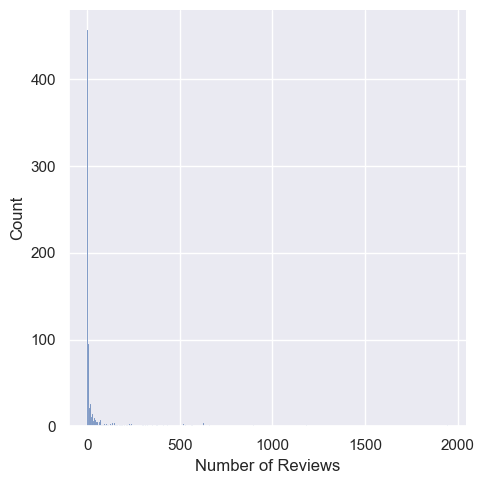

In [11]:
for x in raw_data.columns:
    sns.displot(raw_data[x])

In [16]:
q = raw_data['Price'].quantile(0.99) 
raw_data = raw_data[raw_data['Price']<q]

In [17]:
q = raw_data['Number of Reviews'].quantile(0.99) 
raw_data = raw_data[raw_data['Number of Reviews']<q]

In [18]:
q = raw_data['Number of Ratings'].quantile(0.99) 
raw_data = raw_data[raw_data['Number of Ratings']<q]

Text(0.5, 1.0, 'EngineV and Price')

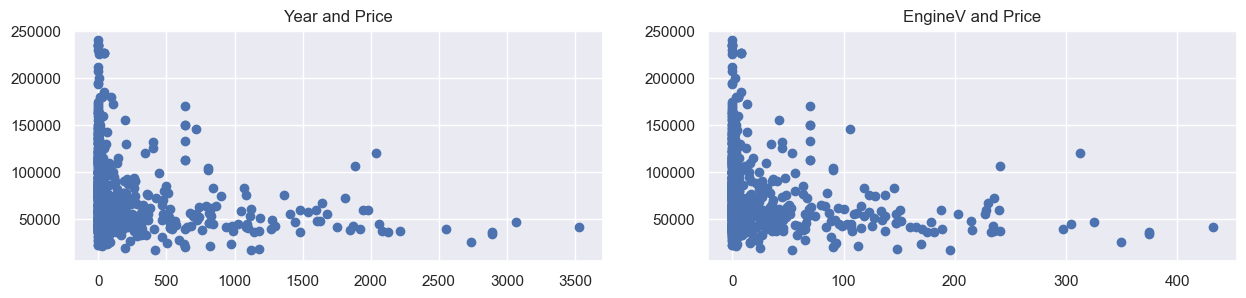

In [20]:
#All dependent variables must be linear 
plt.subplot(1,2,1)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(raw_data['Number of Ratings'], raw_data['Price'])
plt.title("Year and Price")
#Graph is not linear but exponential

plt.subplot(1,2,2)
plt.rcParams["figure.figsize"] = (15,3)
plt.scatter(raw_data['Number of Reviews'], raw_data['Price'])
plt.title("EngineV and Price")

In [21]:
data = raw_data

datanew = pd.get_dummies(data, drop_first = True)
datanew.head()

,Price,Number of Ratings,Number of Reviews,brand_ASUS,brand_Avita,brand_DELL,brand_HP,brand_Lenovo,brand_MSI,brand_acer,...,weight_ThinNlight,warranty_2 years,warranty_3 years,warranty_No warranty,Touchscreen_Yes,msoffice_Yes,rating_2 stars,rating_3 stars,rating_4 stars,rating_5 stars
0,34649,3,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,True,False,False,False
1,38999,65,5,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
2,39999,8,1,False,False,False,False,True,False,False,...,False,False,False,True,False,False,False,True,False,False
3,69990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False
4,26990,0,0,True,False,False,False,False,False,False,...,False,False,False,True,False,False,False,True,False,False


In [22]:
indep = datanew.drop(axis =1, columns = ['Price'])
depend = datanew['Price']
scaler = StandardScaler()
scaler.fit(indep)
scaled_indep = scaler.transform(indep)
scaled_indep

#Note how we even scaled the dummy variables which is not a good practice though. A better method could have been to scale just numerical input data

array([[-0.42196468, -0.43179269,  1.53118837, ..., -0.87462377,
        -1.07301042, -0.13380139],
       [-0.28192459, -0.34013261, -0.65308751, ...,  1.14334876,
        -1.07301042, -0.13380139],
       [-0.41067112, -0.41346067, -0.65308751, ...,  1.14334876,
        -1.07301042, -0.13380139],
       ...,
       [-0.42874081, -0.43179269,  1.53118837, ...,  1.14334876,
        -1.07301042, -0.13380139],
       [-0.42874081, -0.43179269,  1.53118837, ...,  1.14334876,
        -1.07301042, -0.13380139],
       [-0.38808401, -0.35846462, -0.65308751, ..., -0.87462377,
         0.9319574 , -0.13380139]])

In [23]:
xtrain, xtest, ytrain, ytest = train_test_split(scaled_indep, depend, test_size = 0.2, random_state = 365)
#testsize = 0.2 separates 80% data for training and 20% for testing purposes

In [24]:
reg = LinearRegression()
reg.fit(xtrain, ytrain)
#log linear regression created

LinearRegression()

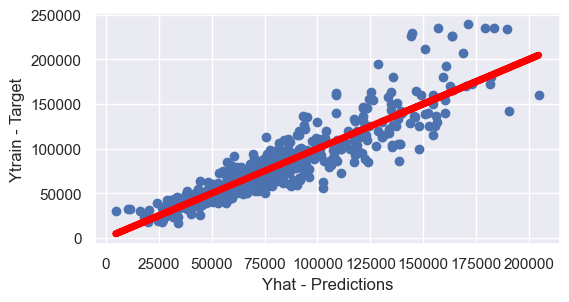

In [26]:
#We know how multiple linear regression equation is:
#y^ = b0 + b1x1 + b2x2 +.... so

yhat = reg.predict(xtrain)
plt.rcParams["figure.figsize"] = (6,3)
plt.scatter(yhat, ytrain)
plt.xlabel("Yhat - Predictions")
plt.ylabel("Ytrain - Target")
plt.plot(yhat, yhat, color = 'red', linewidth = 5)
plt.show()

#CAN YOU SEE HOW WELL THE REGRESSION FITTED!?

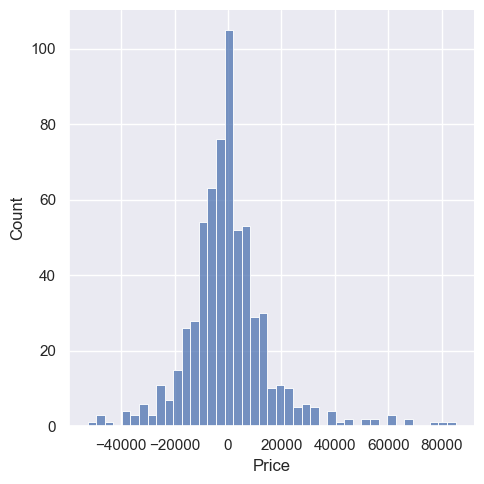

In [27]:
sns.displot(ytrain-yhat)

In [28]:
#One of the last checks of calculating R2
#The 0.75 value says that our model predicts 75% of our data
reg.score(xtrain,ytrain)

0.8287540404664238

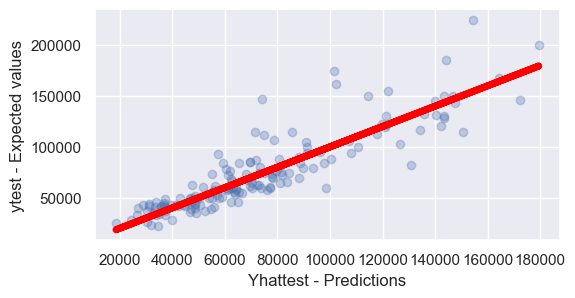

In [30]:
yhattest = reg.predict(xtest)
plt.rcParams["figure.figsize"] = (6,3)
plt.scatter(yhattest, ytest, alpha = 0.3)
plt.xlabel("Yhattest - Predictions")
plt.ylabel("ytest - Expected values")
plt.plot(yhattest, yhattest, color = 'red', linewidth = 5)
plt.show()

#PERFECT!

In [31]:
testdf = pd.DataFrame(yhattest, columns = ['Prediction'])
testdf.head()
#Don't forget that these are log values!!!!!

,Prediction
0,121061.511283
1,37828.960837
2,44902.960837
3,44160.960837
4,146693.511283


In [33]:
#Time to convert the log values back to their origional prices!
#For that we just took the exponential 

testdf = pd.DataFrame(yhattest, columns = ['Prediction'])
testdf.head(10)

,Prediction
0,121061.511283
1,37828.960837
2,44902.960837
3,44160.960837
4,146693.511283
5,68940.960837
6,73017.511283
7,179472.960837
8,147706.960837
9,61740.960837


In [34]:
testdf['Expected- Target'] = ytest
testdf.head(15)

,Prediction,Expected- Target
0,121061.511283,34649.0
1,37828.960837,NaN
2,44902.960837,NaN
3,44160.960837,NaN
4,146693.511283,NaN
5,68940.960837,NaN
6,73017.511283,21990.0
7,179472.960837,NaN
8,147706.960837,NaN
9,61740.960837,NaN


In [35]:
ytest.reset_index(drop = True, inplace = True)

In [36]:
testdf['Expected- Target'] = ytest
testdf.head(15)

,Prediction,Expected- Target
0,121061.511283,119990
1,37828.960837,39490
2,44902.960837,41990
3,44160.960837,42490
4,146693.511283,149999
5,68940.960837,66999
6,73017.511283,62490
7,179472.960837,199990
8,147706.960837,142990
9,61740.960837,76012


In [37]:
testdf['Difference'] = testdf['Expected- Target'] - testdf['Prediction']
#We could try adding percentage difference
testdf['% Difference'] = np.absolute((testdf['Expected- Target'] - testdf['Prediction'])*100/(testdf['Expected- Target']))
testdf.head()

#This is way better!

,Prediction,Expected- Target,Difference,% Difference
0,121061.511283,119990,-1071.511283,0.893000
1,37828.960837,39490,1661.039163,4.206227
2,44902.960837,41990,-2912.960837,6.937273
3,44160.960837,42490,-1670.960837,3.932598
4,146693.511283,149999,3305.488717,2.203674


In [38]:
pd.options.display.max_rows = 1000
testdf.sort_values(by = ["% Difference"], inplace = True)
testdf.head()

,Prediction,Expected- Target,Difference,% Difference
62,80467.511283,80490,22.488717,0.027940
33,50022.960837,49990,-32.960837,0.065935
20,37018.960837,36990,-28.960837,0.078294
111,53272.960837,53190,-82.960837,0.155971
120,121515.511283,121990,474.488717,0.388957


In [39]:
testdf.tail()

,Prediction,Expected- Target,Difference,% Difference
28,52407.511283,36490,-15917.511283,43.621571
55,74187.511283,147000,72812.488717,49.532305
48,34485.511283,21990,-12495.511283,56.823607
34,130734.960837,81990,-48744.960837,59.452324
22,98547.511283,59990,-38557.511283,64.273231
